## Yellowbrick 

Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn. The library implements a new core API object, the Visualizer that is an scikit-learn estimator — an object that learns from data. Similar to transformers or models, visualizers learn from data by creating a visual representation of the model selection workflow.

**Installation** : pip install yellowbrick

In [ ]:
!pip install yellowbrick
# !pip install -U yellowbrick

### Regression Visualizers

In [56]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_bikeshare
from yellowbrick.regressor import ResidualsPlot

from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

import warnings
warnings.filterwarnings('ignore')

X, y = load_bikeshare()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Residuals Plot**

The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

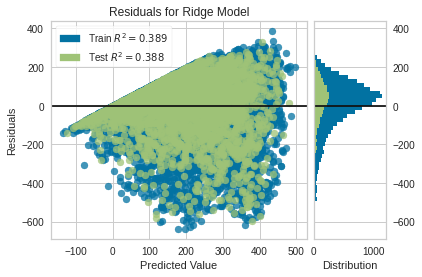

In [5]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.

**Prediction Error Plot**

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. 

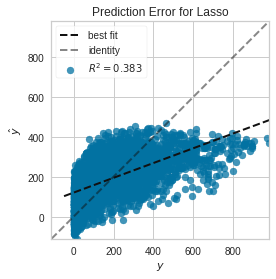

In [10]:
# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Target Visualizers

Target visualizers specialize in visually describing the dependent variable for supervised modeling, often referred to as y or the target.

1.Class Balance

This helps to see imbalance of classes in target column.

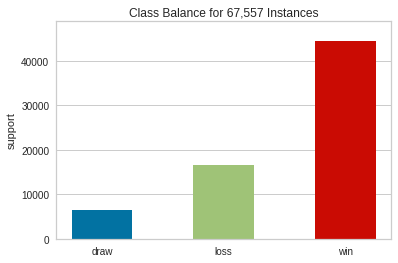

In [11]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The resulting figure allows us to diagnose the severity of the balance issue.

2.Feature Correlation

Plot correlation between features and dependent variables.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


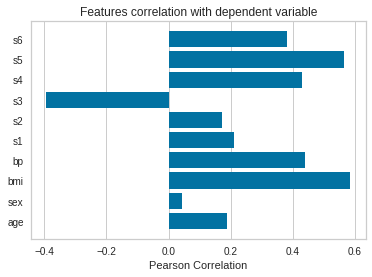

In [13]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation
import numpy as np

# Load the regression dataset
data = datasets.load_diabetes()
X, y = data['data'], data['target']

# Create a list of the feature names
features = np.array(data['feature_names'])

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

This visualization helps in feature selection to identify features with high correlation or large mutual information with the dependent variable.

## Classification Visualizers

### Classification Report

A visual classification report that displays precision, recall, and F1 per-class as a heatmap.

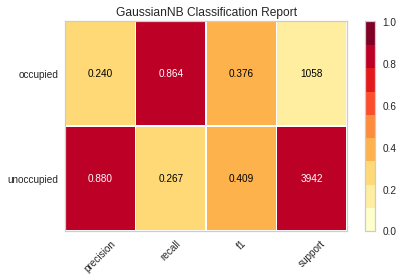

In [41]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.datasets import load_credit
from yellowbrick.classifier import ClassificationReport

# Load the classification dataset
X, y = load_credit()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and show the figure


Confusion Matrix

A heatmap view of the confusion matrix of pairs of classes in multi-class classification.

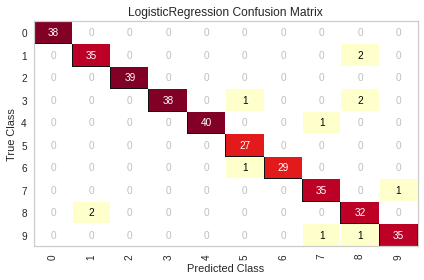

In [39]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = tts(X, y, test_size =0.2, random_state=11)

model = LogisticRegression(multi_class="auto", solver="liblinear")

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

ROCAUC

A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) to visualize the tradeoff between the classifier’s sensitivity and specificity.

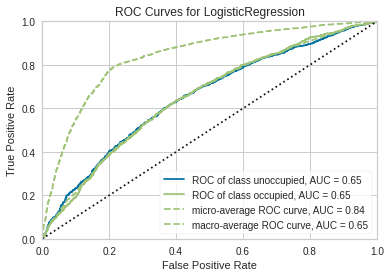

In [42]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["unoccupied", "occupied"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and show the figure

## Precision-Recall Curves

Plots the precision and recall for different probability thresholds.

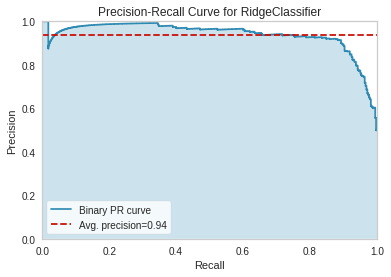

In [43]:
import matplotlib.pyplot as plt

from yellowbrick.datasets import load_spam
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve

# Load the dataset and split into train/test splits
X, y = load_spam()

X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RidgeClassifier(random_state=0))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## Clustering Visualizers

### Elbow Method

visualize the clusters according to some scoring function, look for an “elbow” in the curve.

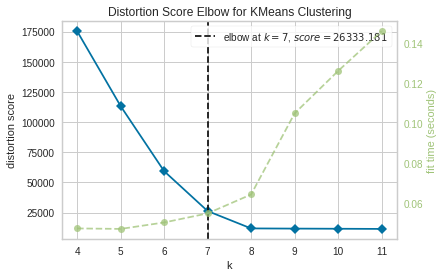

In [44]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Silhouette Visualizer

visualize the silhouette scores of each cluster in a single model.

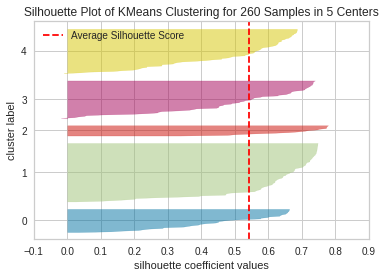

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X, y = load_nfl()

# Specify the features to use for clustering
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = X.query('Tgt >= 20')[features]

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

## Model Selection Visualizers

### Cross Validation Scores

Displays cross-validated scores as a bar chart with average as a horizontal line.

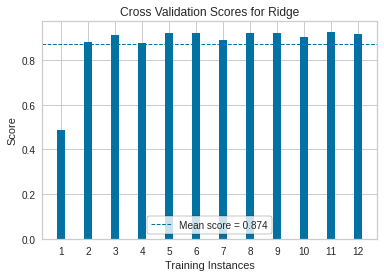

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import CVScores

# Load the regression dataset
X, y = load_energy()

# Instantiate the regression model and visualizer
cv = KFold(n_splits=12, random_state=42)

model = Ridge()
visualizer = CVScores(model, cv=cv, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show();           # Finalize and render the figure

### Feature Importances

rank features by relative importance in a model

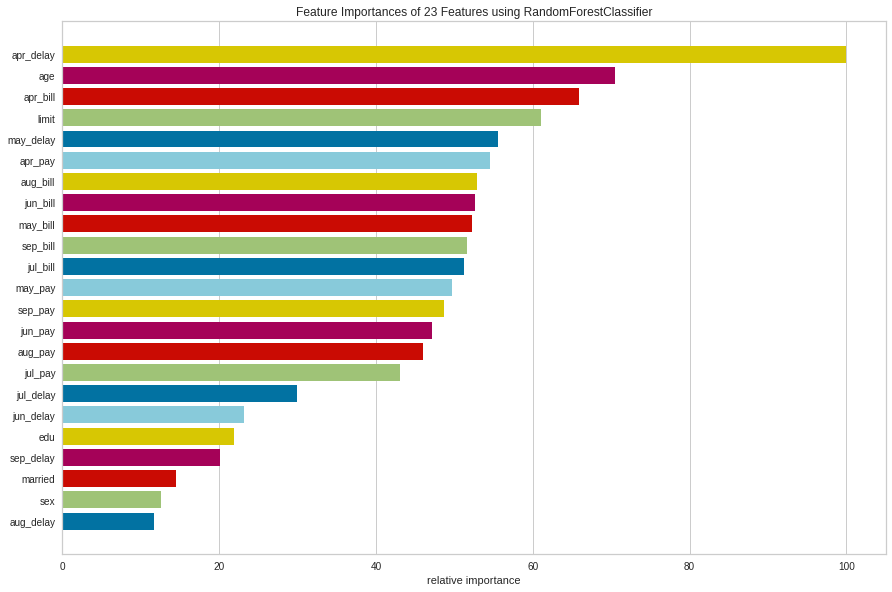

In [63]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

# Load the classification data set
X, y = load_credit()

visualizer = RadViz(
    classes=classes, features=features, size=(900,600))

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show();

### Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

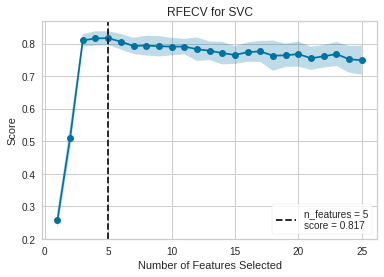

In [64]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.model_selection import RFECV

# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=25, n_informative=3, n_redundant=2,
    n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure